# lab5c 2/20/20: Simpsons Paradox

## Berkeley example, 1974

Lab taken from that of [Michael Li](https://github.com/tianhuil), [here](https://github.com/tianhuil/static-visualization/blob/master/UCBerkeley.ipynb) (thanks Michael!)

1. The original [Science paper](http://www.sciencemag.org/content/187/4175/398.abstract)
2. or reading the explanation on [Wikipedia](http://en.wikipedia.org/wiki/Simpson's_paradox).

See below for the explanation.

A note on data: they are widely available online! see, e.g., [this one](http://www.calvin.edu/~stob/data/Berkeley.csv) from Professor [Michael Stob](http://www.calvin.edu/~stob//)

In [1]:
# imports:


import matplotlib
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline  

import pandas as pd
import seaborn as sns

from matplotlib.ticker import FuncFormatter
sns.set_style("whitegrid")
sns.set(font_scale=1.5) 

In [2]:
# data

tuples = [
    ('Male', 'Applicants'),
    ('Male', 'Admissions Rate'),
    ('Female', 'Applicants'),
    ('Female', 'Admissions Rate'),
]

def to_percent(y, position):
    # Ignore the passed in position. This has the effect of scaling the default
    # tick locations.
    s = str(100 * y)

    # The percent symbol needs escaping in latex
    if matplotlib.rcParams['text.usetex'] == True:
        return s + r'$\%$'
    else:
        return s + '%'
percent_formatter = FuncFormatter(to_percent)

index = pd.MultiIndex.from_tuples(tuples, names=['Gender', 'Stat'])

df = pd.DataFrame([
["A", 825, .62, 108, .82],
["B", 560, .63, 25, .68],
["C", 325, .37, 593, .34],
["D", 417, .33, 375, .35],
["E", 191, .28, 393, .24],
["F", 373, .6, 341, .7],
["Total", 2691, .45, 1835, .30],
]).set_index(0).T.set_index(index).T
df.index.names=['Department']
df = df.swaplevel(0,1,axis=1).stack()
df['Stderr'] = np.sqrt(df['Admissions Rate'] / df['Applicants'])
df = df.unstack('Gender').stack('Gender')
df['Fraction Applicants'] = df['Applicants'] / df['Applicants'].sum()
df = df.unstack('Gender').stack('Gender')

## The Paradox

The fraction of women who were admitted to UC Berkeley's graduate program in 1973 is statistically significantly lower than for men.

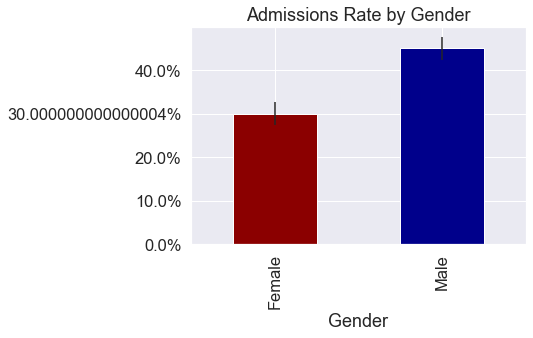

In [3]:
# plot 1
total = df.loc['Total']
ax1 = (total.unstack()['Admissions Rate']
    .plot(
        yerr=2*total.unstack()['Stderr'],
        kind='bar',
        legend=False,
        color=['DarkRed','DarkBlue']
))
ax1.set_title('Admissions Rate by Gender')
ax1.yaxis.set_major_formatter(percent_formatter)

Yet, when you break it up by department, the trend reverses itself: if anything, women are more sightly likely to be admitted.

Text(0.5, 1.0, 'Admissions Rate by Gender and Department')

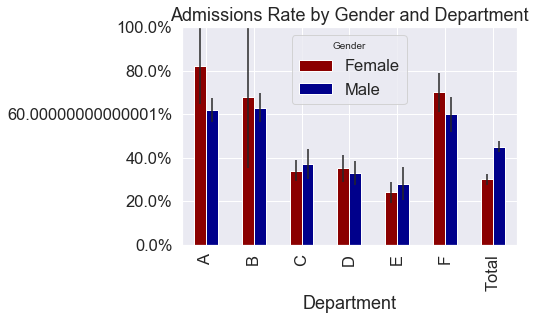

In [4]:
# plot 2
ax2 = (df['Admissions Rate'].unstack()
     .plot(
        yerr=2*df['Stderr'].unstack(),
        kind='bar',
        legend=True,
        color=['DarkRed','DarkBlue']
))
plt.ylim([0., 1.])
ax2.yaxis.set_major_formatter(percent_formatter)
ax2.set_title('Admissions Rate by Gender and Department')

## The explanation

The explanation lies in the fact that women disproportionately applied to more competitive departments, which lowered their overall admissions rate.  This example is often a cautionary tale used to illustrate the need to dig deeper in the data and that data alone cannot tell a story.

# Bickel's figure: updating

Let's see if we can update Figure 1 (see [the original](https://homepage.stat.uiowa.edu/~mbognar/1030/Bickel-Berkeley.pdf) )

Text(0.5, 1.0, 'Admissions Rate and Applicants by Department and Gender')

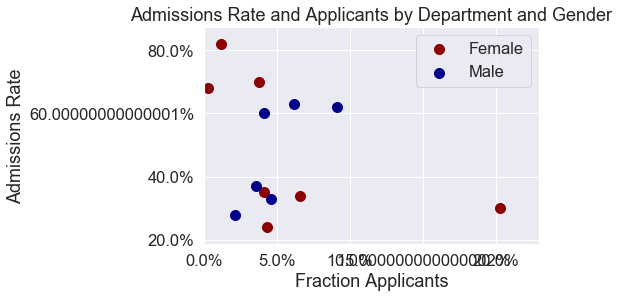

In [5]:
# plot 3
df_dept = df.iloc[:-1]

ax3 = df_dept.xs('Female', level='Gender').plot(
    y='Admissions Rate',
    x='Fraction Applicants',
    color='DarkRed',
    kind='scatter',
    s=100,
    label='Female'
)
df_dept.xs('Male', level='Gender').plot(
    y='Admissions Rate',
    x='Fraction Applicants',
    color='DarkBlue',
    kind='scatter',
    s=100,
    ax=ax3,
    label='Male'
)
plt.legend()
plt.xlim([0., plt.xlim()[1]])
ax3.xaxis.set_major_formatter(percent_formatter)
ax3.yaxis.set_major_formatter(percent_formatter)
ax3.set_title('Admissions Rate and Applicants by Department and Gender')


# for more, see "Paradoxes" chapter in Pearl 2018

For a discussion of several illustrations in health data, e.g., a drug that is good for everyone within one stratum but bad overall, see the discussion in the recent ["The Book of Why"](https://books.google.com/books?id=9H0dDQAAQBAJ&printsec=frontcover&dq=the+book+of+why&hl=en&sa=X&ved=0ahUKEwit5MOb2czgAhXvmuAKHclcDTAQ6AEIKjAA#v=onepage&q=simpson's%20paradox&f=false)

e.g., 


![Fake data, health table](https://raw.githubusercontent.com/data-ppf/data-ppf.github.io/master/images/pearl-table.png)



> “we saw that 3/40 > 1/20 (these were the frequencies of heart attack among women with and without Drug D) and 8/20 > 12/40 (the frequencies among men). Yet when we combined women and men, the inequality reversed direction: (3 + 8)/(40 + 20) < (1 + 12)/(20 + 40).”

Excerpt From: Judea Pearl. “The Book of Why.” 


![Fake data, exercise example](https://raw.githubusercontent.com/data-ppf/data-ppf.github.io/master/images/pearl-fake.png)

> “FIGURE 6.6. Simpson’s paradox: exercise appears to be beneficial (downward slope) in each age group but harmful (upward slope) in the population as a whole.”

Excerpt From: Judea Pearl. “The Book of Why.” 

The search for more confounders -- relevant variables -- based on domain expertise is what Freedman meant by [shoe leather.](https://www.merriam-webster.com/dictionary/shoe-leather). He [writes](https://psychology.okstate.edu/faculty/jgrice/psyc5314/Freedman_1991A.pdf):

> As a piece of statistical technology, Table 1 is by no means
remarkable. But the story it tells is very persuasive. The force of the
argument results from the clarity of the prior reasoning, the bringing
together of many different lines of evidence, and the amount of shoe
leather Snow was willing to use to get the data. 